# 의사결정나무(Decison Tree)

- [의사결정 나무](https://scikit-learn.org/stable/modules/tree.html#)
  - 모델의 의사결정 규칙을 **나무형태**로 표현하는 모델
  - 분할된 영역에 클래스 데이터가 최대한 많이 존재하도록 각 축으로 영역을 분할하여 생성
    - 즉, 불순도 (impurity)가 작은 방향, information gain이 큰 방향으로 분기 (e.g., entropy, gini index, ...)
  - [ID3](https://tyami.github.io/machine%20learning/decision-tree-2-ID3/), [C4.5](https://tyami.github.io/machine%20learning/decision-tree-3-c4_5/), [CART](https://tyami.github.io/machine%20learning/decision-tree-4-CART/) 등의 알고리즘이 있으며, 본 강의에서는 의사결정나무를 생성하는 대표적인 알고리즘인 CART(Classification And Regression Tree)를 사용
- **장점**
  - 모델이 생성한 규칙을 이해하기 쉬우며, 축에 수직으로 분할되어 설명력이 좋다.
  - 연속형 및 범주형 변수를 모두 처리 할 수 있음.
  - 통계적 가정 불필요
- **단점**
  - 과적합이 발생하기 쉬우므로 가지치기나 앙상블 기법 도입 필요함.
  - 입력변수와 출력변수 간의 복잡한 관계에는 사용하기 어려움.


### 1. 데이터 로드 및 전처리

In [4]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib

#한글깨짐 방지
#matplotlib.rcParams['font.family'] ='Malgun Gothic'
#matplotlib.rcParams['axes.unicode_minus'] =False

In [6]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 경로 설정
data=pd.read_csv(URL+"data/class_balance.csv")

In [8]:
data.head()

X1        X2        X3        X4        X5        X6        X7  \
0  0.457896  0.530189  0.276976  0.359864  0.193059  0.322190  0.706897   
1  0.607100  0.341478  0.518992  0.395300  0.042071  0.469654  0.750000   
2  0.360781  0.369653  0.341039  0.021697  0.181737  0.528684  0.491379   
3  0.460910  0.413500  0.535685  0.302794  0.242326  0.408966  0.646552   
4  0.263068  0.279821  0.535685  0.302794  0.242326  0.408966  0.646552   

         X8        X9       X10  ...      X466      X467      X468      X469  \
0  0.553781  0.653894  0.375204  ...  0.246376  0.711806  0.008532  0.013672   
1  0.542031  0.447466  0.189233  ...  0.523785  0.760417  0.030930  0.033203   
2  0.516722  0.300371  0.376835  ...  0.185769  0.659722  0.005333  0.003906   
3  0.561615  0.415328  0.313214  ...  0.246376  0.000000  1.000000  1.000000   
4  0.638747  0.660074  0.520392  ...  0.110711  0.517361  0.023677  0.022461   

       X470      X471      X472      X473      X474  Y  
0  0.008467  0.402240  0.238811  0.274876  0.210238 -1  
1  0.029759  0.210356  0.309339  0.328358  0.439175 -1  
2  0.005311  0.381877  0.208171  0.208955  0.155761 -1  
3  1.000000  0.381877  0.208171  0.208955  0.155761 -1  
4  0.023447  0.608414  0.212062  0.268657  0.092827 -1  

[5 rows x 475 columns]

In [10]:
print(data['Y'].value_counts(normalize=True))

-1    0.590551
 1    0.409449
Name: Y, dtype: float64


[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

In [11]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2
                                                    # , stratify=data_Y
                                                    , random_state=22,shuffle =True)

### 2. 평가 지표 함수

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

###### 이미지 출처 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [12]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1]) # TN/(TN + FP), 정상데이터 중 모델이 정상으로 옳게 분류한 비율

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0]) # TP/(TP + FN), 불량데이터 중 모델이 불량으로 옳게 분류한 데이터 비율
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1]) # TP/(TP + FP), 모델이 불량으로 분류한 데이터 중 실제 불량데이터 비율

    G_mean = recall_score(Y_test,pred) * specificity1

    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))


### 3. 모델 학습 및 예측

In [13]:
X_train

X1        X2        X3        X4        X5        X6        X7  \
165  0.322290  0.413022  0.569323  0.212561  0.161114  0.400306  0.232759   
212  0.271282  0.403363  0.196032  0.375072  0.099246  0.725267  0.732759   
253  0.164343  0.571191  0.324472  0.401357  0.249864  0.229873  0.448276   
222  0.334484  0.353618  0.430362  0.546260  0.434019  0.313601  0.568966   
75   0.480214  0.498559  0.204031  0.109006  0.103541  0.508834  0.525862   
..        ...       ...       ...       ...       ...       ...       ...   
100  0.352476  0.401779  0.463937  0.126285  0.083402  0.491896  0.284483   
192  0.348334  0.738141  0.596598  0.539023  0.067757  0.421749  0.379310   
44   0.524848  0.999370  0.156724  0.019864  0.109003  0.537550  0.525862   
132  0.605444  0.397618  0.234016  0.637354  0.163959  0.338264  0.870690   
117  0.197750  0.390574  0.222614  0.132807  0.154885  0.430756  0.500000   

           X8        X9       X10  ...      X465      X466      X467  \
165  0.800542  0.446230  0.535073  ...  0.000000  0.038468  0.538194   
212  0.260319  0.487021  0.458401  ...  0.283280  0.246376  0.559028   
253  0.592648  0.498146  0.340946  ...  0.201493  0.214622  0.621528   
222  0.573667  0.509271  0.412724  ...  0.283280  0.246376  0.972222   
75   0.813498  0.559951  1.000000  ...  0.604478  0.288678  0.704861   
..        ...       ...       ...  ...       ...       ...       ...   
100  0.473938  0.483313  0.543230  ...  0.283280  0.246376  0.697917   
192  0.646279  0.618047  0.370310  ...  0.410448  0.204643  0.809028   
44   0.706538  0.430161  0.484502  ...  0.134328  0.289561  0.694444   
132  0.792106  0.580964  0.383361  ...  0.283280  0.246376  0.506944   
117  0.463091  0.483313  0.632953  ...  0.283280  0.246376  0.902778   

         X468      X469      X470      X471      X472      X473      X474  
165  0.003413  0.009766  0.003682  0.504854  0.000000  0.000000  0.032254  
212  0.022824  0.022461  0.022485  0.592233  0.338521  0.500000  0.137327  
253  0.020904  0.018555  0.020352  0.309061  0.178988  0.201493  0.179953  
222  0.019198  0.017578  0.018208  0.271845  0.153696  0.141791  0.190806  
75   0.012372  0.014648  0.012172  0.503236  0.536965  0.604478  0.242047  
..        ...       ...       ...       ...       ...       ...       ...  
100  0.024104  0.033203  0.023404  0.428803  0.116732  0.126866  0.093068  
192  0.029437  0.029297  0.028217  0.525890  0.379377  0.410448  0.171586  
44   0.020265  0.026367  0.019717  0.211974  0.134241  0.134328  0.242786  
132  0.013439  0.017578  0.013549  0.349515  0.282101  0.343284  0.217039  
117  0.039676  0.034180  0.037589  0.148867  0.247082  0.328358  0.611548  

[203 rows x 474 columns]

[[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)]    
**사전 가지치기**   
: 나무가 완성(Full Tree)되기 전에 특정조건을 만족하는 경우 알고리즘을 중단하는 방법. 하이퍼파라미터로 손쉽게 설정 가능
      
**주요 하이퍼파라미터**  
- **max_depth** : 트리의 최대깊이를 설정. 값이 클수록 모델의 복잡도가 올라간다. [int, default = None]
- **min_samples_split** : 자식노드를 분할하는데 필요한 최소 샘플의 수 [int or float, default = 2]
- **min_samples_leaf** : leaf node에서 필요한 최소 샘풀수이며, 너무 적을 시 과적합 발생
- **max_leaf_nodes** : 최대 leaf node 수 제한 [int, default=None]


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
# 원하는 파라미터 설정 (파라미터를 추가하려면 위의 함수에도 추가해줘야함.)
# 사전 가지치기를 위한 하이퍼 파라미터들
params={
    "max_depth":[4,6,8,10],
    "min_samples_leaf" : [2, 4, 6],
    "min_samples_split" : range(2,8,2),
    "max_leaf_nodes": [5,10,15]
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 4x3x3x3 = 총 108개의 경우의수를 담은 리스트 반환
print(params_list[0])
print(" ")

# Grid search 진행
score_list = []
for params2 in params_list:
    model_use = DecisionTreeClassifier(random_state = 0,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
    model_use.fit(X_train, Y_train)
    valid_pred = model_use.predict(X_test)
    tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
 
BEST SCORE 0.7428571428571428
BEST PARAMS {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [28]:
list(range(2,8,2))


[2, 4, 6]

In [26]:
np.arange(2,8,2)

array([2, 4, 6])

In [10]:
# best case의 하이퍼파라미터로 의사결정나무 학습

model_use = DecisionTreeClassifier(random_state = 0,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


0.7428571428571428
Train 데이터 성능
model의 recall 값은 0.872
model의 2종 오류 확률 값은 0.128
model의 Specificity 값은 0.983
model의 1종 오류 확률 값은 0.017
model의 precision 값은 0.974
model의 f1_score 값은 0.920
model의 G-mean 값은 0.926
model의 accuracy 값은 0.936
 
TEST 데이터 성능
model의 recall 값은 0.722
model의 2종 오류 확률 값은 0.278
model의 Specificity 값은 0.879
model의 1종 오류 확률 값은 0.121
model의 precision 값은 0.765
model의 f1_score 값은 0.743
model의 G-mean 값은 0.797
model의 accuracy 값은 0.824


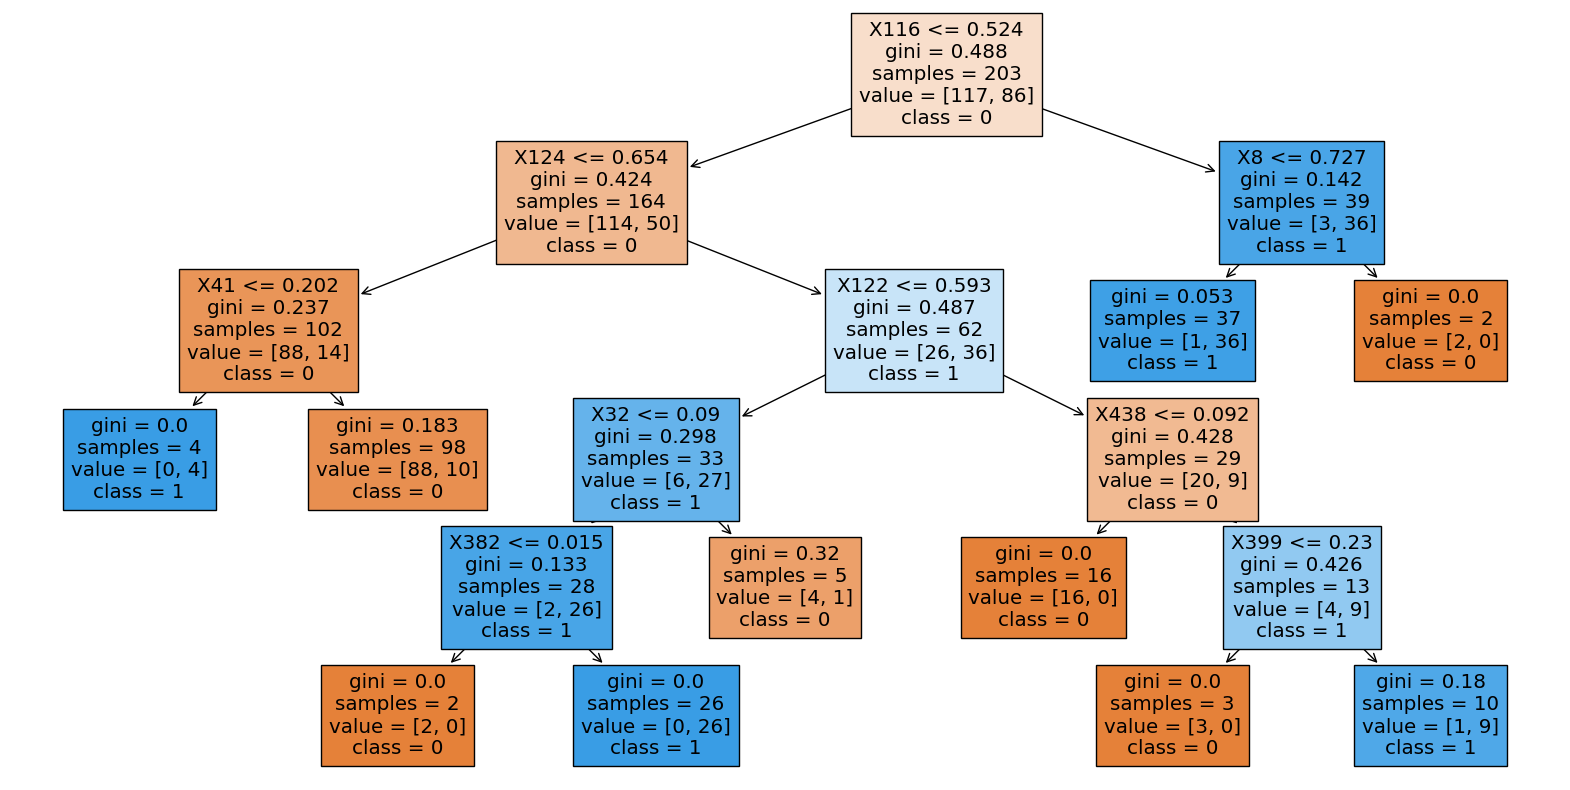

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 의사결정나무 시각화
plt.figure(figsize=(20,10))
plot_tree(model_use, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()